In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.array([-5,-1,-1,-2])
        self.weights2   = np.array([-1,-4])
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output

In [4]:
bias = 0.5; inputs=[[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
for x in inputs:
    h1 = sigmoid(x[0]*bias + x[1]*-5 + x[2]*-1)
    h2 = sigmoid(x[0]*bias + x[1]*-1 + x[2]*-2)
    y = sigmoid(h1*-1 + h2*-4 + bias)
    print(x[1:],y)

[0, 0] 0.0683512091645131
[0, 1] 0.35268841698554093
[1, 0] 0.26480352941643615
[1, 1] 0.5479762297645293


In [5]:
lr = 0.5
x = [1,2,3]
w = [0.1,1,0.1]
y = 1

output = sigmoid(x[0]*w[0] + x[1]*w[1] + x[2]*w[2])
g0 = -(y-output)*output*(1-output)*x[0]
g1 = -(y-output)*output*(1-output)*x[1]
g2 = -(y-output)*output*(1-output)*x[2]
w0_ = w[0] - lr*g0
w1_ = w[1] - lr*g1
w2_ = w[2] - lr*g2
print("w0 =",w0_)
print("w1 =",w1_)
print("w2 =",w2_)

w0 = 0.10317116694614202
w1 = 1.0063423338922841
w2 = 0.10951350083842606


In [11]:
train_X = np.array([[1,2,4]] * 100)
train_y = np.array([[1]] * 75 + [[0]] * 25)


In [15]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        self.weights = np.random.rand(3,1)
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(train_X, train_y)
# train neural network
NN.train()

In [18]:
NN.predict(np.array([[-2,4,-5]]))

array([[0.99999396]])

In [9]:
import matplotlib.pyplot as plt

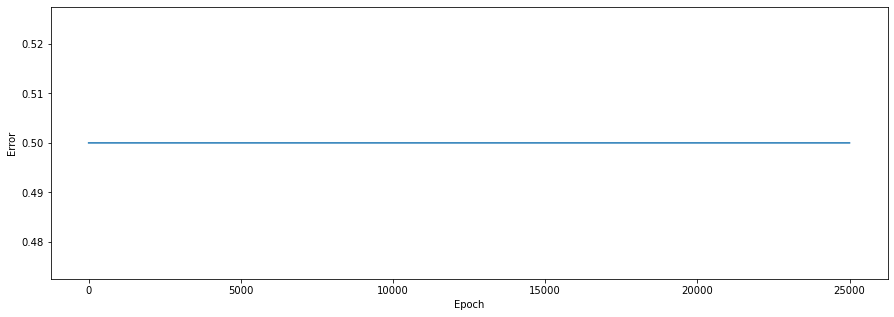

In [10]:
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()